In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/imobiliaria.csv", sep = ";")

In [ ]:
df.head()

,DataVenda,HoraVenda,FormaPagamento,ValorVenda,CorretorResponsavel,NomeCliente,TipoPessoa,Municipio,Bairro,Logradouro,TipoImovel,Preco,Ano_Venda,diferenca_dias,Id
0,2023-05-10,1900-01-01 14:30:00,À vista,"350,000,000.00",Pedro Almeida,José da Silva,Física,Itanhaém,Centro,Av. Brasil 120,Casa,"350,000,000.00",2023,0 days,1
1,2023-06-22,1900-01-01 10:15:00,Financiamento,"550,000,000.00",Mariana Rocha,Maria Oliveira,Física,Mairiporã,Jardim Boa Vista,Rua das Flores 45,Casa,"550,000,000.00",2023,43 days,2
2,2023-07-05,1900-01-01 16:45:00,Parcelado,"280,000,000.00",Carlos Nogueira,Antônio Souza,Física,São Paulo,Brasilândia,Rua Projetada 300,Apartamento,"280,000,000.00",2023,56 days,3
3,2023-08-12,1900-01-01 11:00:00,À vista,"940,000,000.00",Fernanda Lima,Construtora Horizonte,Jurídica,Guarujá,Enseada,Av. Atlântica 500,Apartamento,"950,000,000.00",2023,94 days,4
4,2023-09-01,1900-01-01 09:20:00,Financiamento,"1,200,000,000.00",Ricardo Santos,João Mendes,Física,Campos do Jordão,Capivari,Rua das Hortênsias 12,Casa,"1,200,000,000.00",2023,114 days,5


In [ ]:
df['Id'] = range(1, len(df) + 1)
display(df.head())

,DataVenda,HoraVenda,FormaPagamento,ValorVenda,CorretorResponsavel,NomeCliente,TipoPessoa,Municipio,Bairro,Logradouro,TipoImovel,Preco,Ano_Venda,diferenca_dias,Id
0,2023-05-10,1900-01-01 14:30:00,À vista,"350,000,000.00",Pedro Almeida,José da Silva,Física,Itanhaém,Centro,Av. Brasil 120,Casa,"350,000,000.00",2023,0 days,1
1,2023-06-22,1900-01-01 10:15:00,Financiamento,"550,000,000.00",Mariana Rocha,Maria Oliveira,Física,Mairiporã,Jardim Boa Vista,Rua das Flores 45,Casa,"550,000,000.00",2023,43 days,2
2,2023-07-05,1900-01-01 16:45:00,Parcelado,"280,000,000.00",Carlos Nogueira,Antônio Souza,Física,São Paulo,Brasilândia,Rua Projetada 300,Apartamento,"280,000,000.00",2023,56 days,3
3,2023-08-12,1900-01-01 11:00:00,À vista,"940,000,000.00",Fernanda Lima,Construtora Horizonte,Jurídica,Guarujá,Enseada,Av. Atlântica 500,Apartamento,"950,000,000.00",2023,94 days,4
4,2023-09-01,1900-01-01 09:20:00,Financiamento,"1,200,000,000.00",Ricardo Santos,João Mendes,Física,Campos do Jordão,Capivari,Rua das Hortênsias 12,Casa,"1,200,000,000.00",2023,114 days,5


In [ ]:
df.shape

(66, 12)

In [ ]:
df.dtypes

,0
DataVenda,datetime64[ns]
HoraVenda,datetime64[ns]
FormaPagamento,object
ValorVenda,float64
CorretorResponsavel,object
NomeCliente,object
TipoPessoa,object
Municipio,object
Bairro,object
Logradouro,object


In [ ]:
df['DataVenda'] = pd.to_datetime(df['DataVenda'], format="%d/%m/%Y")
df['HoraVenda'] = pd.to_datetime(df['HoraVenda'], format="%H:%M:%S")
df[' Preco '] = df[' Preco '].astype(str).str.replace('R$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df[' ValorVenda '] = df[' ValorVenda '].astype(str).str.replace('R$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [ ]:
df[' ValorVenda '].sum()

np.float64(5668000000.0)

In [ ]:
df.isnull().sum()

,0
DataVenda,0
HoraVenda,0
FormaPagamento,0
ValorVenda,0
CorretorResponsavel,0
NomeCliente,0
TipoPessoa,0
Municipio,0
Bairro,0
Logradouro,0


In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

# Displaying the grouped sales data again with the new format
df.groupby([df["DataVenda"].dt.year, "TipoImovel"])[" ValorVenda "].sum()

DataVenda  TipoImovel 
2023       Apartamento       1,970,000,000.00
           Casa              2,100,000,000.00
2024       Apartamento      32,350,000,000.00
           Casa             15,640,000,000.00
           Comercial         3,320,000,000.00
           Terreno           1,300,000,000.00
Name:  ValorVenda , dtype: float64

In [ ]:
lucro_ano = df.groupby([df["DataVenda"].dt.year, "TipoImovel"])[" ValorVenda "].sum().reset_index()
lucro_ano

,DataVenda,TipoImovel,ValorVenda
0,2023,Apartamento,"1,970,000,000.00"
1,2023,Casa,"2,100,000,000.00"
2,2024,Apartamento,"32,350,000,000.00"
3,2024,Casa,"15,640,000,000.00"
4,2024,Comercial,"3,320,000,000.00"
5,2024,Terreno,"1,300,000,000.00"


In [ ]:
qntd_imoveis_por_tipo = df['TipoImovel'].value_counts()
display(qntd_imoveis_por_tipo)

,count
TipoImovel,
Apartamento,40
Casa,22
Comercial,3
Terreno,1


In [ ]:
df['Ano_Venda'] = df['DataVenda'].dt.year

In [ ]:
df["DataVenda"].min()

Timestamp('2023-05-10 00:00:00')

In [ ]:
df["diferenca_dias"] = df["DataVenda"] - df["DataVenda"].min()

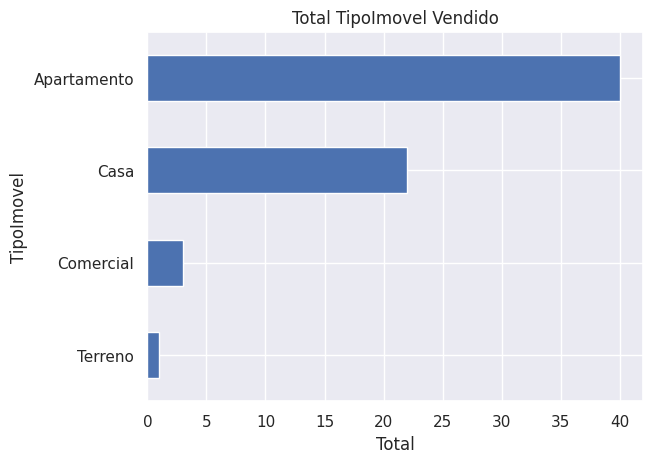

In [ ]:
qntd_imoveis_por_tipo.sort_values(ascending=True).plot.barh(title="Total TipoImovel Vendido")
plt.xlabel("Total")
plt.ylabel("TipoImovel");